# Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import Dataset

In [4]:
df = pd.read_csv('bmi.csv')
df.head(5)

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669


In [5]:
df = df.dropna()

In [6]:
df.columns

Index(['Sex', 'Age', 'Height(Inches)', 'Weight(Pounds)', 'BMI'], dtype='object')

In [7]:
df.describe()

,Age,Height(Inches),Weight(Pounds),BMI
count,24950.000000,24950.000000,24950.000000,24950.000000
mean,26.497836,67.992821,127.077390,19.321368
std,5.190667,1.901551,11.663509,1.552091
min,18.000000,60.278360,78.014760,13.070879
25%,22.000000,66.704955,119.307525,18.278339
50%,27.000000,67.995700,127.152500,19.302160
75%,31.000000,69.271823,134.893550,20.357547
max,35.000000,75.152800,170.924000,26.023756


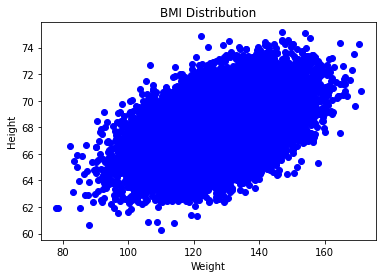

In [8]:
plt.scatter(df['Weight(Pounds)'].values,df['Height(Inches)'].values,color='blue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('BMI Distribution')
plt.show()

In [9]:
df['Sex'] = df['Sex'].replace('Male', 0) 
df['Sex'] = df['Sex'].replace('Female', 1)

In [10]:
df.head(2)

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,1,21,65.78331,112.9925,18.357646
1,1,35,71.51521,136.4873,18.762652


In [11]:
df['BMI'].describe()

count    24950.000000
mean        19.321368
std          1.552091
min         13.070879
25%         18.278339
50%         19.302160
75%         20.357547
max         26.023756
Name: BMI, dtype: float64

In [12]:
df.rename(columns = {
    "Height(Inches)":"Height",
    "Weight(Pounds)":"Weight"},inplace = True)

In [13]:
df.head()

,Sex,Age,Height,Weight,BMI
0,1,21,65.78331,112.9925,18.357646
1,1,35,71.51521,136.4873,18.762652
2,1,27,69.39874,153.0269,22.338985
3,0,24,68.21660,142.3354,21.504612
4,1,18,67.78781,144.2971,22.077669


In [14]:
x = df[['Height', 'Weight']]
y = df[['BMI']]

# Training and Testing The data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(19960, 2)

In [17]:
x_test.shape

(4990, 2)

In [18]:
y_train.shape

(19960, 1)

In [19]:
y_test.shape

(4990, 1)

In [20]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)
y_pred

array([[19.02287694],
       [20.11580987],
       [20.50655137],
       ...,
       [18.07308885],
       [18.78383607],
       [20.81994023]])

# Evaluating The Metrics

In [22]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.055770665082581196


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9967331315655572